In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
%matplotlib inline

## KMeans Clustering

In [2]:
dataset = pd.read_csv('konsumen.csv', sep=';')
dataset.head()

,No,Gaji,Pengeluaran
0,1,2500,1750
1,2,3800,4200
2,3,3900,3800
3,4,4350,5500
4,5,4400,3200


In [3]:
df = pd.DataFrame(dataset)
df.head()

,No,Gaji,Pengeluaran
0,1,2500,1750
1,2,3800,4200
2,3,3900,3800
3,4,4350,5500
4,5,4400,3200


In [4]:
df.keys()

Index(['No', 'Gaji', 'Pengeluaran'], dtype='object')

In [5]:
df = df.drop(columns=['No'])
df.head()

,Gaji,Pengeluaran
0,2500,1750
1,3800,4200
2,3900,3800
3,4350,5500
4,4400,3200


In [6]:
X = np.array(df)
print(X)

[[ 2500  1750]
 [ 3800  4200]
 [ 3900  3800]
 [ 4350  5500]
 [ 4400  3200]
 [ 5500  5450]
 [ 5600  5950]
 [ 5750  4100]
 [ 6850  6050]
 [ 6900  8500]
 [ 7250  9500]
 [ 7350  6050]
 [ 7500  8500]
 [ 7800  9500]
 [ 8200  8300]
 [ 8500  6500]
 [ 8550  8400]
 [ 8750  6000]
 [ 9100 10500]
 [ 9100  8500]]


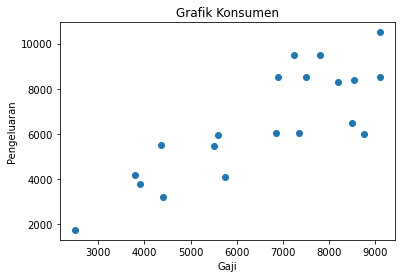

In [7]:
plt.scatter(X[:,0], X[:,1], label='True Position')
plt.xlabel('Gaji')
plt.ylabel('Pengeluaran')
plt.title('Grafik Konsumen')
plt.show()

In [8]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

C:\Users\awan\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [9]:
print(kmeans.cluster_centers_)

[[7987.5  8025.  ]
 [4475.   4243.75]]


In [10]:
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0]


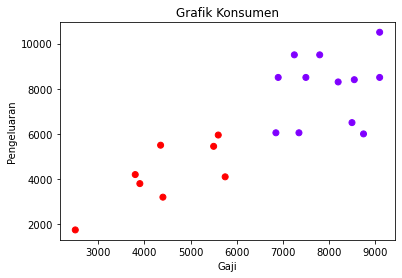

In [11]:
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_ , cmap='rainbow')
plt.xlabel('Gaji')
plt.ylabel('Pengeluaran')
plt.title('Grafik Konsumen')
plt.show()

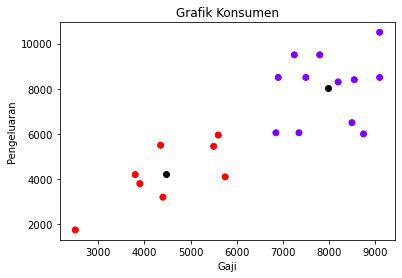

In [12]:
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_ , cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')
plt.xlabel('Gaji')
plt.ylabel('Pengeluaran')
plt.title('Grafik Konsumen')
plt.show()

## Evaluate K Using Silhoute Analysis

In [13]:
#Evaluasi jumlah cluster untuk K=2-5
from sklearn.metrics import silhouette_score
for i in range (2,6):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(X)

    score = silhouette_score(X, kmeans.labels_)
    print(" Silhouette Score untuk K-Means dengan K = ",i," adalah ", score)

 Silhouette Score untuk K-Means dengan K =  2  adalah  0.5554663423362192
 Silhouette Score untuk K-Means dengan K =  3  adalah  0.46139304143642645
 Silhouette Score untuk K-Means dengan K =  4  adalah  0.46112700541701346
 Silhouette Score untuk K-Means dengan K =  5  adalah  0.44384880493504414


C:\Users\awan\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\awan\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\awan\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\awan\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows wi

## Evaluate K Using Dunn Index

In [14]:
#Evaluasi jumlah cluster untuk K=2-5
from sklearn.metrics import davies_bouldin_score
for i in range (2,6):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(X)
    
    scoreDBI= davies_bouldin_score(X, kmeans.labels_)
    print(" DB Index untuk K-Means dengan K = ",i," adalah ", scoreDBI)

C:\Users\awan\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\awan\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


 DB Index untuk K-Means dengan K =  2  adalah  0.5777500906135428
 DB Index untuk K-Means dengan K =  3  adalah  0.6692677998442881
 DB Index untuk K-Means dengan K =  4  adalah  0.6762428343547594
 DB Index untuk K-Means dengan K =  5  adalah  0.5438563441084899


C:\Users\awan\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\awan\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


## Agglomerative Clustering

In [21]:
from numpy import unique, where
from sklearn.datasets import make_classification
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt


In [22]:
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, 
                          n_clusters_per_class=1, random_state=4)


In [23]:
model = AgglomerativeClustering(n_clusters=2)

In [24]:
y_pred = model.fit_predict(X)

In [25]:
#retrieve unique cluster
clusters = unique(y_pred)

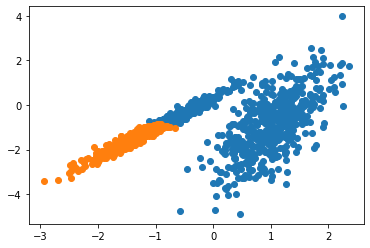

In [26]:
for cluster in clusters:
    row_ix = where(y_pred == cluster)
    plt.scatter(X[row_ix,0],X[row_ix,1])
plt.show()